Analysis of the final merged dataframes!

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,}'.format

genresDF = pd.read_csv("/content/genres.csv")
movies = pd.read_csv("/content/merged_df_final.csv")
df = pd.DataFrame(movies[['budget','runtime','revenue','year']]).join(genresDF)
finalDF = df.drop(['Unnamed: 0'], axis=1)
print(finalDF.head())

        budget  runtime       revenue    year             score  Horror  \
0 19,000,000.0    145.0  45,508,073.0 1,980.0              8.25       1   
1  4,500,000.0    104.0  58,853,106.0 1,980.0               5.8       0   
2  3,500,000.0     88.0  83,453,539.0 1,980.0               7.4       0   
3  6,000,000.0     98.0  39,846,344.0 1,980.0 6.949999999999999       0   
4 27,000,000.0    133.0 115,229,890.0 1,980.0               7.7       0   

   Action  Family  Drama  Adventure  Crime  Science Fiction  Western  Music  \
0       0       0      1          0      0                0        0      0   
1       0       0      1          1      0                0        0      0   
2       0       0      0          0      0                0        0      0   
3       0       0      0          0      0                0        0      0   
4       1       0      0          0      1                0        0      1   

   Animation  Comedy  Biography  Foreign  Thriller  History  War  Romance 

In [ ]:
print(finalDF.shape)

(3253, 24)


In [ ]:
print(finalDF.describe())

                   budget            runtime              revenue  \
count             3,253.0            3,253.0              3,253.0   
mean  40,903,493.23132493 109.55041500153705 118,767,740.33261605   
std   42,844,516.55159666  19.28020331412174  186,278,720.5700931   
min               7,000.0               63.0              2,536.5   
25%          12,000,000.0               96.0         16,757,163.0   
50%          26,500,000.0              106.0         52,785,556.5   
75%          55,000,000.0              119.5        141,220,678.0   
max         270,000,000.0              262.5      2,817,605,645.0   

                     year              score              Horror  \
count             3,253.0            3,253.0             3,253.0   
mean  2,003.3298493698126  6.366461727636028 0.11097448509068553   
std     8.203235487036707 0.8903094833617842 0.31414882896672264   
min               1,980.0                1.9                 0.0   
25%               1,999.0             

In [ ]:
finalDF.isnull().sum()

budget             0
runtime            0
revenue            0
year               0
score              0
Horror             0
Action             0
Family             0
Drama              0
Adventure          0
Crime              0
Science Fiction    0
Western            0
Music              0
Animation          0
Comedy             0
Biography          0
Foreign            0
Thriller           0
History            0
War                0
Romance            0
Mystery            0
Fantasy            0
dtype: int64

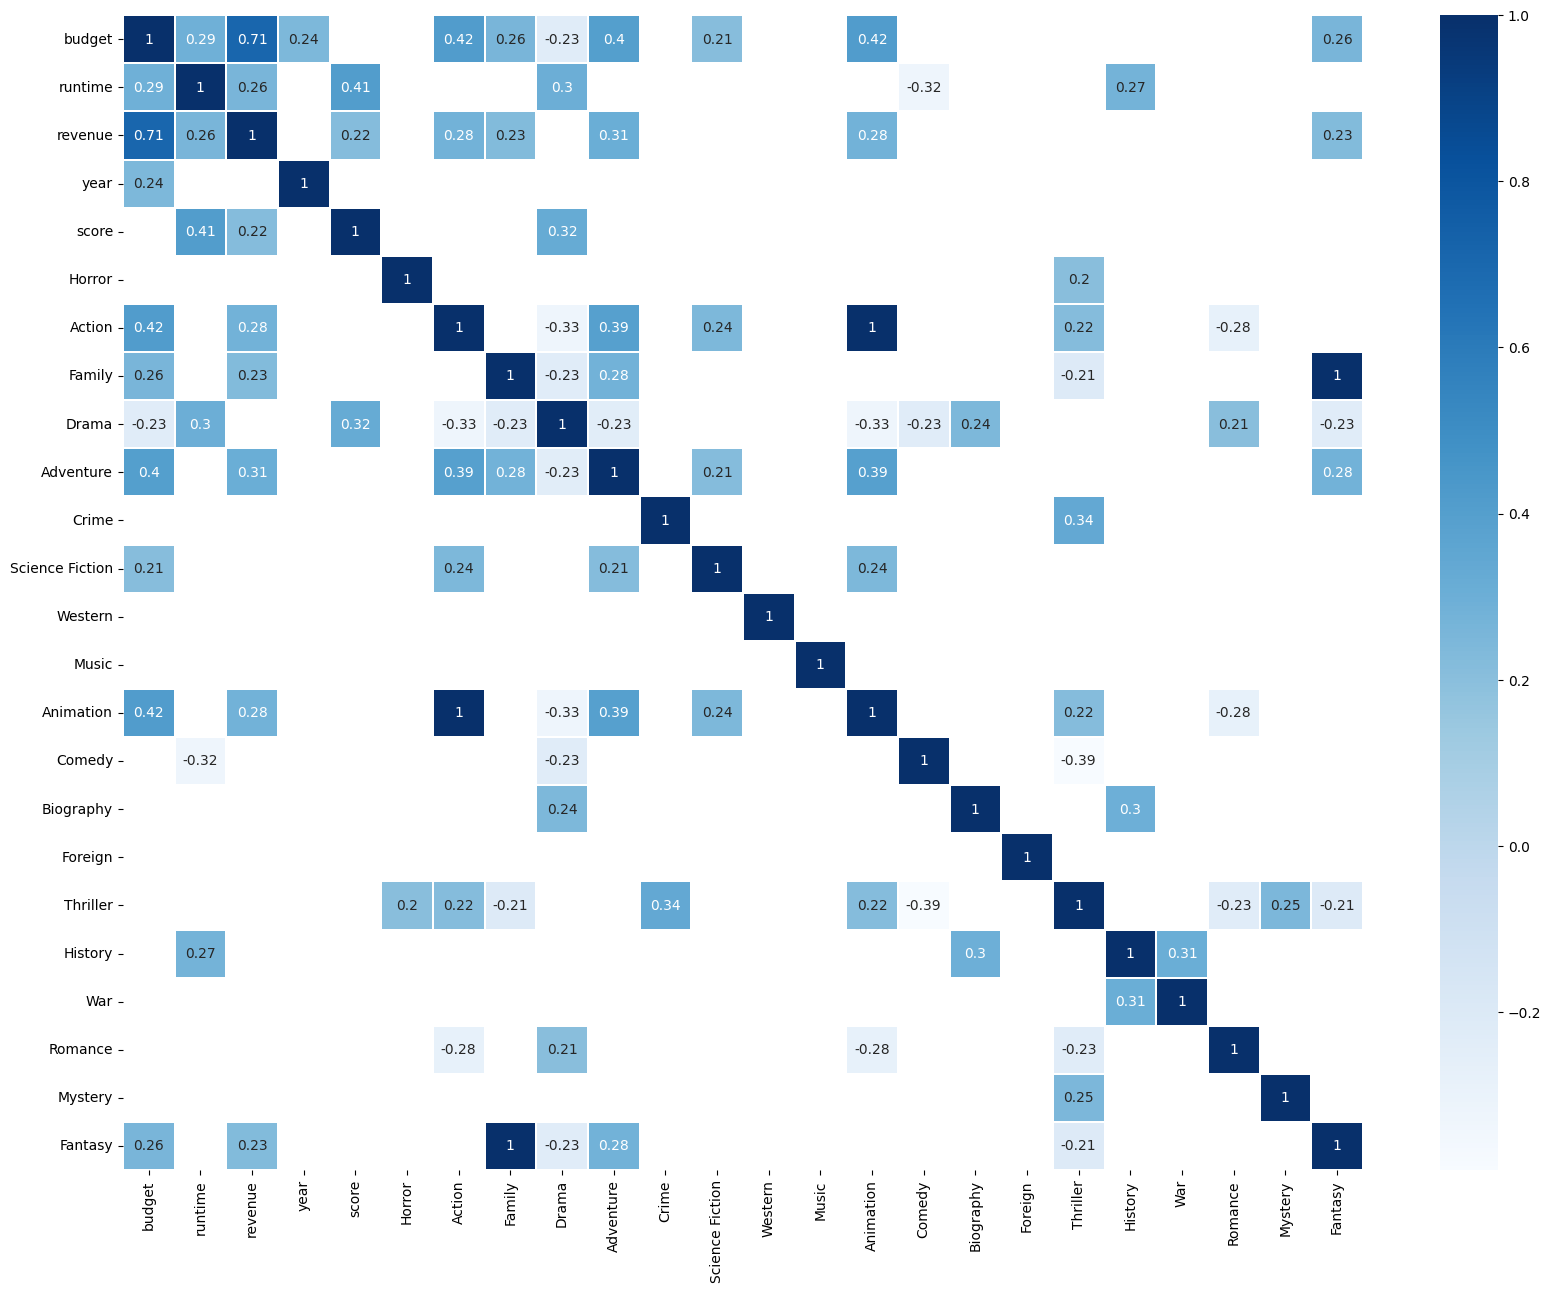

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# Create a correlation matrix
corr_matrix = finalDF.corr()

# Replace values smaller than 0.2 in absolute value with np.nan
corr_matrix[corr_matrix.abs() < 0.2] = np.nan



# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap=mpl.colormaps["Blues"], linewidths=0.2)

# Get the current figure
fig = plt.gcf()

# Set figure size
fig.set_size_inches(20, 15)

# Show the plot
plt.show()

In [ ]:
#Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(finalDF.drop('score',axis=1),
                                                    finalDF['score'], test_size=0.30,
                                                    random_state=101)

In [ ]:
# Fit the multiple linear regression model using LinearRegression estimator, and fit it to the training data:

# Create a LinearRegression object
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Intercept of the model
print("Intercept: ", lm.intercept_)

Intercept:  19.13854025914558


In [ ]:
# Create a DataFrame for coefficients
coeff_df = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficient'])

# Display the DataFrame
print(coeff_df.sort_values(by=['Coefficient'],ascending=False))

                            Coefficient
Drama                0.3284107074805283
Biography           0.24394024790394525
Western             0.16570057209058903
Crime               0.08942072761508778
War                 0.07562357463339522
Music              0.046539889999363176
Mystery             0.01378193600627407
runtime            0.012840855939791508
Animation         0.0026778039230057177
Action            0.0026778039230050308
Science Fiction    0.000978734457999642
revenue          1.8963337840622324e-09
budget          -5.9138654899164104e-09
year             -0.0070823616253263425
History           -0.014235149553979462
Family            -0.025929475236957288
Fantasy           -0.025929475236957947
Romance             -0.1092857759312837
Thriller           -0.11040935458639303
Comedy              -0.1246854493752137
Adventure          -0.13241424385473366
Horror              -0.2598611904938779
Foreign             -0.5649786788770212


Let's compare the coeffs in our original dataframe with only 3 features.

In [ ]:
# (from original dataframe)
          Coefficient
year     1.193426e-03
budget  -7.218613e-09
revenue  1.750452e-09
runtime  1.914854e-02

# (from our dataset combined with genres)
                            Coefficient
year             -0.0070823616253263425
budget          -5.9138654899164104e-09
revenue          1.8963337840622324e-09
runtime            0.012840855939791508

# for the most part the numbers didn't really change significantly at all



Here, I try to see if there is a correlation between how many 1s a genre has and their coefficients by sorting sorting both the 1 counts and coefficients by genre. Why? I was thinking maybe we could see a correlation somehow, but obviously you don't

In [ ]:
# DramaOne = finalDF["Drama"].value_counts()[1]
# DramaZero = finalDF["Drama"].value_counts()[0]
# print(DramaOne)
# print("{0:.0%}".format(DramaOne/(DramaOne+DramaZero)))
colDict = {}
for col in finalDF.columns[5:]:
  One = finalDF[col].value_counts()[1]
  Zero = finalDF[col].value_counts()[0]
  print(f"{col}: value_count = {One}," "\n in percentage: {0:.0%}".format(One/(One+Zero)))
  colDict[col] = One

Horror: value_count = 361,
 in percentage: 11%
Action: value_count = 1230,
 in percentage: 38%
Family: value_count = 622,
 in percentage: 19%
Drama: value_count = 1558,
 in percentage: 48%
Adventure: value_count = 728,
 in percentage: 22%
Crime: value_count = 611,
 in percentage: 19%
Science Fiction: value_count = 414,
 in percentage: 13%
Western: value_count = 43,
 in percentage: 1%
Music: value_count = 96,
 in percentage: 3%
Animation: value_count = 1230,
 in percentage: 38%
Comedy: value_count = 1247,
 in percentage: 38%
Biography: value_count = 187,
 in percentage: 6%
Foreign: value_count = 1,
 in percentage: 0%
Thriller: value_count = 979,
 in percentage: 30%
History: value_count = 115,
 in percentage: 4%
War: value_count = 87,
 in percentage: 3%
Romance: value_count = 612,
 in percentage: 19%
Mystery: value_count = 281,
 in percentage: 9%
Fantasy: value_count = 622,
 in percentage: 19%


In [ ]:
colDictSorted = sorted(colDict.items(), key=lambda x:x[1],reverse=True)
colDictSorted = dict(colDictSorted)
coeffSorted = coeff_df.sort_values(by=['Coefficient'],ascending=False).index.tolist()
print(f"Coefficients sorted: {coeffSorted}" )
print(f"Value Counts: {colDictSorted.keys()}")

Coefficients sorted: ['Drama', 'Biography', 'Western', 'Crime', 'War', 'Music', 'Mystery', 'runtime', 'Animation', 'Action', 'Science Fiction', 'revenue', 'budget', 'year', 'History', 'Family', 'Fantasy', 'Romance', 'Thriller', 'Comedy', 'Adventure', 'Horror', 'Foreign']
Value Counts: dict_keys(['Drama', 'Comedy', 'Action', 'Animation', 'Thriller', 'Adventure', 'Family', 'Fantasy', 'Romance', 'Crime', 'Science Fiction', 'Horror', 'Mystery', 'Biography', 'History', 'Music', 'War', 'Western', 'Foreign'])


In [ ]:
import statsmodels.api as sm

# Add a constant to the independent value
X_train_sm = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Get the p-values and the corresponding coefficients
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     46.57
Date:                Sun, 04 Jun 2023   Prob (F-statistic):          4.41e-159
Time:                        13:42:40   Log-Likelihood:                -2578.8
No. Observations:                2277   AIC:                             5202.
Df Residuals:                    2255   BIC:                             5328.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              19.1385      4.122     

In [ ]:
# Make predictions and evaluate the model on the test set
from sklearn.metrics import r2_score, mean_squared_error

predictions = lm.predict(X_test)

# Calculate R-squared for test data
print("R-squared: ", r2_score(y_test, predictions))
# Calculate RMSE for test data
print("RMSE: ", np.sqrt(mean_squared_error(y_test, predictions)))


R-squared:  0.34096735492477437
RMSE:  0.7052353055907912


In [ ]:
# Calculate R-squared for training data
print("R-squared: ", r2_score(y_train, lm.predict(X_train)))
# Calculate RMSE for training data
print("RMSE: ", np.sqrt(mean_squared_error(y_train, lm.predict(X_train))))

R-squared:  0.30248042779030226
RMSE:  0.7509767079436257


Explain the differnce with the first graph.

Text(0, 0.5, 'Predicted Values')

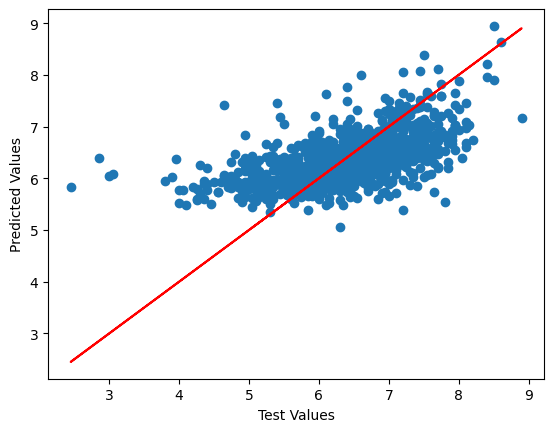

In [ ]:
# Plot the observed vs. predicted values to see how well the model fits the data.
plt.scatter(y_test,predictions)
# fit a 45 degree line
plt.plot(y_test,y_test,'r');
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')

The bottom graph is the first graph!

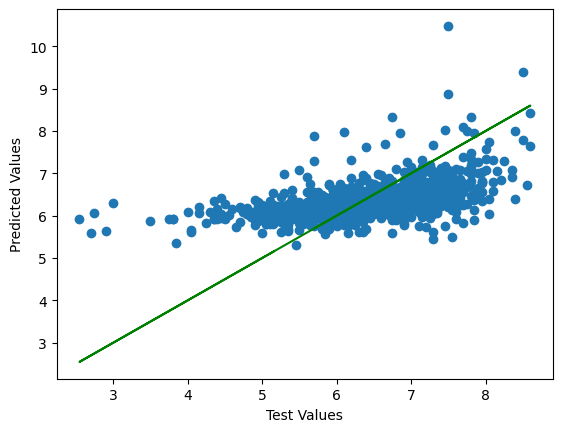

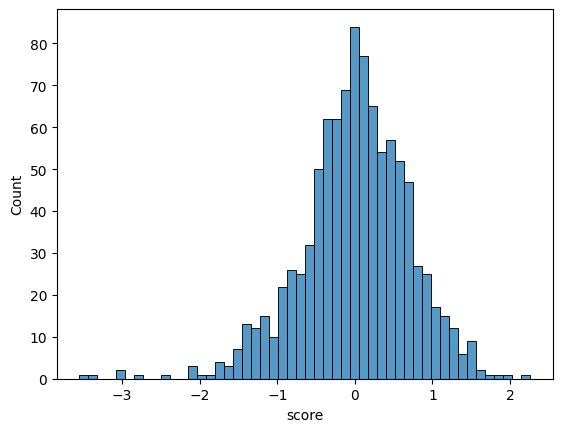

In [ ]:
# Visualize the residuals to check normality assumption.
sns.histplot((y_test-predictions),bins=50);

Bottom graph was the first graph

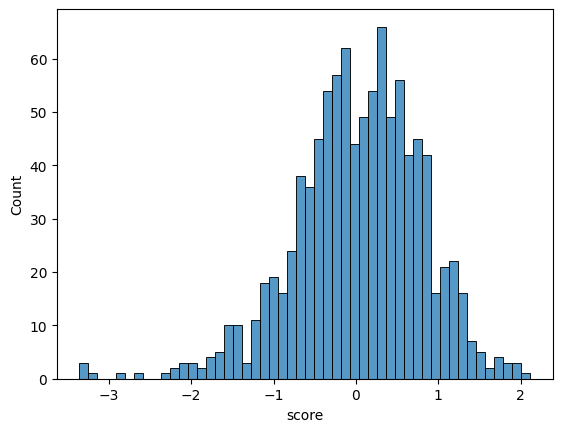

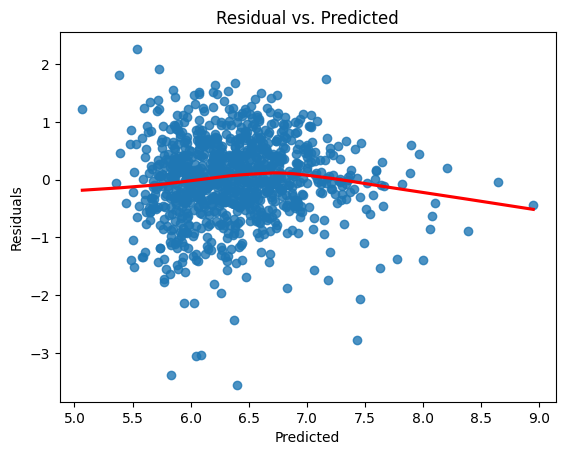

In [ ]:
# Plot residuals (difference between the observed and predicted values) against the predicted values to check homoscedasticity and linearity assumption.
# If no obvious pattern is observed, the linearity and homoscedasticity assumption are satisfied.

predictions = lm.predict(X_test)
residuals = y_test - predictions

sns.regplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual vs. Predicted')
plt.show();

Bottom graph was the first

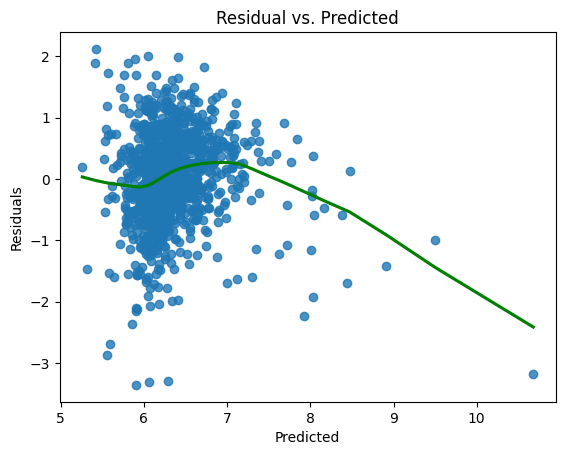

Run LASSO Regression

In [ ]:
# Use the StandardScaler function to preprocess the data.
# The StandardScaler function is a class in the sklearn.preprocessing module,
# which is used to standardize features by removing the mean and scaling to unit variance.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Lasso regression with optimal hyperparameter alpha using cross validation
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lasso.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [ ]:
# The value of alpha that minimizes the cross-validation error:
alpha = lasso.alpha_
alpha

0.0044479397643930035

In [ ]:
# Make predictions on the test set
predictions = lasso.predict(X_test)

# Calculate performance metrics
# First, accuracy for test data
print('R^2:',r2_score(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

R^2: 0.3392543527951446
RMSE: 0.7061512583770313


In [ ]:
# Then, accuracy for training data
print('R^2:',r2_score(y_train, lasso.predict(X_train)))
print('RMSE:', np.sqrt(mean_squared_error(y_train, lasso.predict(X_train))))

R^2: 0.3019451744020487
RMSE: 0.7512647899987931


In [ ]:
# Check the coefficients
coeff_df = pd.DataFrame(lasso.coef_, finalDF.drop('score',axis=1).columns, columns=['score'])
coeff_df.sort_values(by=['score'],ascending=False)

,score
revenue,0.34402027963040305
runtime,0.24203312532541366
Drama,0.1637807729842043
Biography,0.056024987837268864
Crime,0.03178409872815699
Western,0.014268826236921474
War,0.00824484659893368
Music,0.003967279063179171
Animation,-0.0
Mystery,0.0


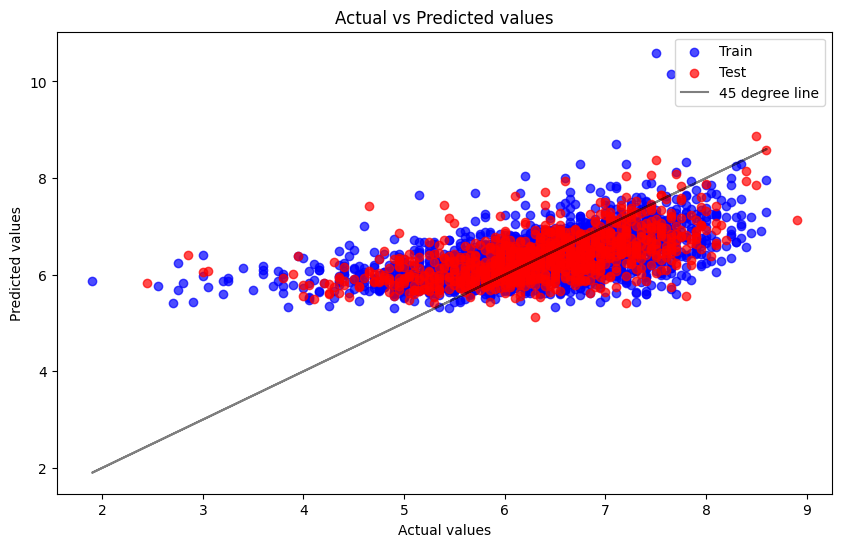

In [ ]:
# We plot the predicted values against the actual values for bothe the train and test data.
# to see how well the model fits the data.
plt.figure(figsize=(10, 6))
plt.scatter(y_train, lasso.predict(X_train), color='blue', alpha=0.7, label='Train')
plt.scatter(y_test, lasso.predict(X_test), color='red', alpha=0.7, label='Test')

# Add a 45 degree line
plt.plot(y_train, y_train, color='black', alpha=0.5, label='45 degree line')

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend();

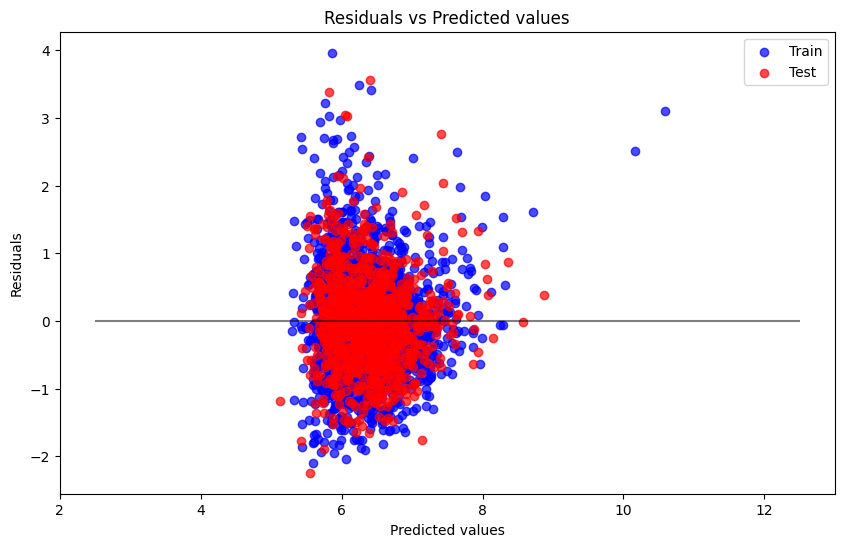

In [ ]:
# Do Residual analysis to check the assumptions of linear regression and homoscedasticity.
# We plot the residuals against the predicted values to check for pissible patterns or biases.
plt.figure(figsize=(10, 6))

plt.scatter(lasso.predict(X_train), lasso.predict(X_train) - y_train, color='blue', alpha=0.7, label='Train')
plt.scatter(lasso.predict(X_test), lasso.predict(X_test) - y_test, color='red', alpha=0.7, label='Test')

# Add a horizontal line at y = 0
plt.hlines(y = 0, xmin = 2.5, xmax = 12.5, color='black', alpha=0.5)

# Add labels and title
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.legend();


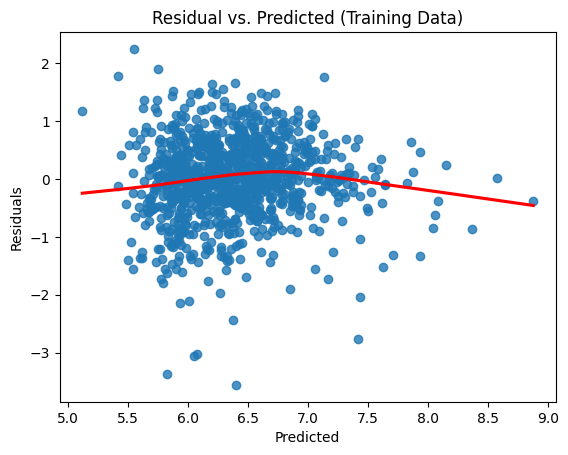

In [ ]:
# Plot residuals against the predicted values to check homoscedasticity and linearity assumption.
# If no obvious pattern is observed, the linearity and homoscedasticity assumption are satisfied.

predictions = lasso.predict(X_test)
residuals = y_test - predictions

sns.regplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual vs. Predicted (Training Data)')
plt.show();